In [2]:
import numpy as np
from math import pi, tanh
from cmath import sqrt
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact

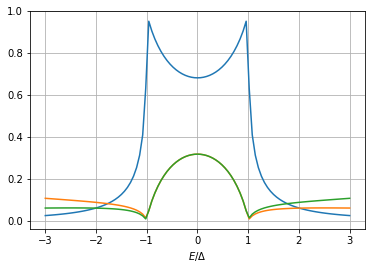

In [22]:
hbar=1
elec=1
Delta=10
mu=100
Z=0.3

s0=np.array([[1,0],[0,1]])
sx=np.array([[0,1],[1,0]])
sy=np.array([[0,-1j],[1j,0]])
sz=np.array([[1,0],[0,-1]])

kF= sqrt(mu)
Esw=np.linspace(-3,3,101)*Delta
# Esw=np.array([2.984*Delta])

Ree=np.zeros(len(Esw), dtype=np.complex64)
Reh=np.zeros(len(Esw), dtype=np.complex64)
q_calc=np.zeros((2,len(Esw)), dtype=np.complex64)
w_calc=np.zeros((2,len(Esw)), dtype=np.complex64)

vec_diff=np.zeros((len(Esw),2), dtype=np.complex64)
dot_prod=np.zeros((2,2,len(Esw)), dtype=np.complex64)
qe_ex=np.zeros(len(Esw), dtype=np.complex64)
qh_ex=np.zeros(len(Esw), dtype=np.complex64)
we_ex=np.zeros(len(Esw), dtype=np.complex64)
wh_ex=np.zeros(len(Esw), dtype=np.complex64)


for i_E in range(len(Esw)):
    E=Esw[i_E]
    evs, evecs = np.linalg.eig(E*sz+mu*s0-1j*Delta*sy)
#     for i_v in range(len(evs)):
#         evecs[:,i_v]=evecs[:,i_v]/np.sqrt(np.dot(evecs[:,i_v].T,evecs[:,i_v]))
#     print(evecs,evs)
#     dot_prod=np.dot(np.transpose(evecs).conj(),evecs)
#     print(dot_prod)

#     u0=sqrt(1+sqrt(1-(Delta/E)**2))/sqrt(2)
#     v0=sqrt(1-sqrt(1-(Delta/E)**2))/sqrt(2)
#     qe_ex[i_E]=sqrt(mu+sqrt(E**2-Delta**2))
#     qh_ex[i_E]=sqrt(mu-sqrt(E**2-Delta**2))
    
#     we_ex[i_E]=sqrt(E**2-Delta**2)/E*qe_ex[i_E]
#     wh_ex[i_E]=sqrt(E**2-Delta**2)/E*qh_ex[i_E]

# #     if E< Delta:
#     Jmat = np.reshape(np.diag(np.dot(np.transpose(evecs).T,np.dot(sz,evecs))),[2,])
# #     else:
# #         Jmat = np.reshape(np.diag(np.dot(np.transpose(evecs).conj(),np.dot(sz,evecs))),[2,])
#     i_p=np.where(np.imag(Jmat) > 0)[0]
#     i_n=np.where(np.imag(Jmat) < 0)[0]
#     if len(i_p)==0 and len(i_n)==0:
#         i_p=np.where(np.real(Jmat) > 0)[0]
#         i_n=np.where(np.real(Jmat) < 0)[0]

    evs_sq=np.sqrt(evs)
    i_evan= np.where( np.abs(np.imag(evs_sq)) > 1e-5 )[0]
    ie_T= np.where( np.imag(evs_sq[i_evan]) > 0)[0]

    i_prop= np.where( np.abs(np.imag(evs_sq)) < 1e-5 )[0]
#     ip_T= np.where( np.real(evs[i_prop]) > 0)[0]
    Jmat = np.reshape(np.diag(np.dot(np.transpose(evecs).conj(),np.dot(sz,evecs))),[2,])
    ip_T= np.where( np.real(Jmat[i_prop]) > 0)[0]
    i_p=np.concatenate((i_prop[ip_T],i_evan[ie_T]))



    J= evs_sq* Jmat
    evecs= np.dot(evecs,np.diag(1/J**0.5))
    devecs= 1j*np.dot(evecs,np.diag(evs**0.5))
    Tevecs= np.zeros((len(evs),len(evs)), dtype=np.complex64)
    Tevecs[:,:len(i_p)] = evecs[:,i_p]
    Tevecs[:,len(i_p):] = evecs[:,i_n]    
    dTevecs= np.zeros((len(evs),len(evs)), dtype=np.complex64)
    dTevecs[:,:len(i_p)] = devecs[:,i_p]
    dTevecs[:,len(i_p):] = -devecs[:,i_n]    
    
# #     p_sc=np.array([[u0,v0],[v0,u0]])
#     p_sc=np.array([[u0/np.sqrt(we_ex[i_E]),v0/np.sqrt(wh_ex[i_E])],\
#                    [v0/np.sqrt(we_ex[i_E]),u0/np.sqrt(wh_ex[i_E])]]) 
#     vec_diff[i_E,0]=np.linalg.norm(p_sc[:,0]-Tevecs[:,1])
#     vec_diff[i_E,1]=np.linalg.norm(p_sc[:,1]-Tevecs[:,1])

#     inds=np.concatenate((i_p,i_n))
#     q_calc[:,i_E]=np.sqrt(evs[inds])
#     w_calc[:,i_E]=J[inds]


#     print(q_calc,qh_ex,qe_ex)
#     print(np.dot(p_sc.T,p_sc))
#     print(np.dot(evecs.T,evecs))
#     print(p_sc)

#     Hmat=E*sz+mu*s0-1j*Delta*sy
#     print(np.dot(Hmat,evecs)/evecs)
#     print(np.dot(Hmat,p_sc)/p_sc)

    
#     we=sqrt(E^2-D0^2)/E*qe;
#     wh=sqrt(E^2-D0^2)/E*qh;
    
#     p_sc=@(x) [u0*exp(1j*qe*x)/sqrt(we),v0*exp(-1j*qh*x)/sqrt(wh);...
#     v0*exp(1j*qe*x)/sqrt(we),u0*exp(-1j*qh*x)/sqrt(wh)];

    
# # #     print(Jmat,i_p,i_n)
    evs_l, evecs_l = np.linalg.eig(E*sz+mu*s0)
    Jmat_l = np.reshape(np.diag(np.dot(np.transpose(evecs_l).T,np.dot(sz,evecs_l))),[2,])
#     i_prop = np.where(np.real(evs_l)> 0)[0]
    i_p_l=np.where(np.real(Jmat_l) > 0)[0]
    i_n_l=np.where(np.real(Jmat_l) <= 0)[0]
#     print(Jmat_l,i_p_l,i_n_l)
#     v_sign_l=np.ones(len(Jmat_l))
#     v_sign_l[i_n] = -np.ones(len(i_n_l))
    J_l= (evs_l**0.5)* Jmat_l
    evecs_l= np.dot(evecs_l,np.diag(1/np.abs(J_l)**0.5))
    devecs_l= 1j*np.dot(evecs_l,np.diag(evs_l**0.5 ))
    
    Revecs_l= np.zeros((len(evs_l),len(evs_l)), dtype=np.complex64)
    Revecs_l[:,:len(i_p_l)] = evecs_l[:,i_p_l]
    Revecs_l[:,len(i_p_l):] = evecs_l[:,i_n_l]    
    dRevecs_l= np.zeros((len(evs_l),len(evs_l)), dtype=np.complex64)
    dRevecs_l[:,:len(i_p_l)] = -devecs_l[:,i_p_l]
    dRevecs_l[:,len(i_p_l):] = devecs_l[:,i_n_l]    

    Tevecs_l = evecs_l[:,i_p_l]
    dTevecs_l = devecs_l[:,i_p_l]

    for i_t in range(len(i_p_l)):
        Psi_sc=np.concatenate((Tevecs,dTevecs),axis=0)
        Psi_lead=np.concatenate((Revecs_l,dRevecs_l+2*Z*kF*Revecs_l),axis=0)
        Psi_t=np.concatenate((Psi_sc,-Psi_lead),axis=1)
        Psi_inc= np.concatenate((Tevecs_l[:,i_t],dTevecs_l[:,i_t]+2*Z*kF*Tevecs_l[:,i_t]),axis=0)
#         evecs,-Revecs_l = Tevecs_l[:,i_t]
#         devecs,-dRevecs_l = dTevecs_l[:,i_t]
        x=np.linalg.solve(Psi_t,Psi_inc)
        Ree[i_E]=x[2]
        Reh[i_E]=x[3]

plt.figure()
plt.plot(Esw/Delta,np.abs(Reh)**2)
plt.plot(Esw/Delta,np.abs(Ree)**2)
plt.plot(Esw/Delta,np.abs(Ree[::-1])**2)
# plt.plot(Esw/Delta,np.imag(Reh))
# plt.plot(Esw/Delta,np.imag(Ree))
plt.grid()
# plt.ylim(0,0.1)

plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E/\Delta$')
plt.show()

# plt.figure()
# # plt.plot(Esw/Delta,np.imag(qe_ex))
# # plt.plot(Esw/Delta,np.imag(q_calc[0,:]).T)
# # plt.plot(Esw/Delta,np.real(we_ex))
# # plt.plot(Esw/Delta,np.real(w_calc[0,:]).T)
# # plt.plot(Esw/Delta,np.abs(dot_prod[0,0,:]))
# # plt.plot(Esw/Delta,dot_prod[0,1,:])
# # plt.plot(Esw/Delta,dot_prod[1,0,:])
# # plt.plot(Esw/Delta,dot_prod[1,1,:])
# plt.plot(Esw/Delta,vec_diff)

# # plt.ylim(0,1)
# plt.grid()
# plt.xlabel(r'$r_{eh}$')
# plt.xlabel(r'$E/\Delta$')
# plt.show()

In [15]:
print(Esw[33]/Delta)
# print(np.linalg.norm(evecs[:,i_v]))

-1.0


In [ ]:
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3
m0=9.1e-31 # kg
Delta=10*meV
mu=1e3*meV


sigma1=np.array([[0,1],[1,0]])
sigma2=np.array([[0,-1j],[1j,0]])
sigma3=np.array([[1,0],[0,-1]])

kF= sqrt(2*m0*mu)/hbar
kmax= 0.1*kF
# klist= np.linspace(-1,1,100)*kmax
# L=1e-5
# klist=np.arange(-kmax,kmax,2*pi/L)+kF
kp= np.linspace(-1,1,400)*kmax+ kF
klist=np.sort(np.concatenate((-kp,kp)))
# klist=np.linspace(-1,1,2000)*1.2*kF
dk=klist[1]-klist[0]


Esw=np.linspace(-.9,.9,100)*Delta
GR=np.zeros((2,2,len(Esw)), dtype=np.complex64)
GA=np.zeros((2,2,len(Esw)), dtype=np.complex64)
eta=1e-3*Delta
En=np.zeros((len(klist),2))
for i_k in range(len(klist)):
    k=klist[i_k]
    H= (hbar**2 * k**2/(2*m0) -mu)*sigma3 + Delta* sigma1
    evs, evecs =np.linalg.eigh(H)
#     J=hbar*k/m0 * sigma3
#     vk=np.diag(np.dot(np.transpose(evecs).conj(),np.dot(J,evecs)))
#     vk= (hbar**2 * k**2/(2*m0) -mu)/evs[1]*hbar*k/m0
#     vk= sqrt(evs[1]**2-Delta**2)/evs[1]*hbar*k/m0

    En[i_k,:]=evs
    for i_E in range(len(Esw)):
        E=Esw[i_E]
        GR[:,:,i_E] += np.dot(evecs,np.dot(np.diag(1/(E-evs+1j*eta)),np.transpose(evecs).conj()))/(2*pi)*hbar*dk/(2*pi)
        GA[:,:,i_E] += np.dot(evecs,np.dot(np.diag(1/(E-evs-1j*eta)),np.transpose(evecs).conj()))/(2*pi)*hbar*dk/(2*pi)
#         GR[:,:,i_E] += np.dot(evecs,np.dot(np.diag(np.abs(vk)/(E-evs+1j*eta)),np.transpose(evecs).conj()))*hbar*dk/(2*pi)
#         GA[:,:,i_E] += np.dot(evecs,np.dot(np.diag(np.abs(vk)/(E-evs-1j*eta)),np.transpose(evecs).conj()))*hbar*dk/(2*pi)
#         Gmat[:,:,i_E] += np.dot(evecs,np.dot(np.diag(1/(E-evs+1j*eta)),np.transpose(evecs).conj()))


plt.figure()
plt.plot(klist/kF,En/Delta)
plt.xlabel(r'$k/k_F$')
plt.ylabel(r'$E/\Delta$')
plt.show()

Smat=np.zeros((2,2,len(Esw)), dtype=np.complex64)
for i_E in range(len(Esw)):
    E=Esw[i_E]
    Smat[:,:,i_E]=np.dot(GR[:,:,i_E],GA[:,:,i_E])


Seh=np.reshape(Smat[0,1,:],[len(Esw),1]) #* (klist[1]-klist[0])                        
See=np.reshape(Smat[0,0,:],[len(Esw),1]) #* (klist[1]-klist[0])                        
# Shh=np.reshape(Gmat[1,1,:],[len(Esw),1]) #* (klist[1]-klist[0])                        
# She=np.reshape(Gmat[1,0,:],[len(Esw),1]) #* (klist[1]-klist[0])                        

plt.figure()
# plt.plot(Esw/Delta,np.real(Seh/Seh[int(len(Esw)/2)])**2)
plt.plot(Esw/Delta,np.abs(Seh))
plt.plot(Esw/Delta,np.abs(See))
# plt.plot(Esw/Delta,np.abs(She)**2)
# plt.plot(Esw/Delta,np.abs(Shh)**2)
# plt.plot(Esw/Delta,np.abs(See)**2+np.abs(Seh)**2)

# plt.plot(Esw/Delta,np.imag(Seh))
# plt.ylim(0,1)
plt.grid()
plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E/\Delta$')
plt.show()

